In [1]:
import numpy as np

In [2]:
x1 = np.random.rand(3, 5) + [0,0,1,1,0]


In [3]:
x1 = x1 / 2

(3,) [ 1.89692337  1.90586525  2.27407008]
[1 0 2]
In while:
order: [1 0 2]
keep: []
[ 0.29776968  0.29776968] [ 0.48417859  0.36367943]
[ 0.60571039  0.60571039] [ 0.68653226  0.67812337]
inds []
order []


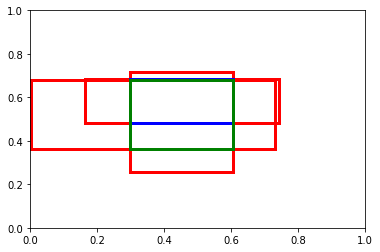

[1]

In [32]:
from itertools import cycle
cycol = cycle('bgrcmk')
def py_cpu_nms(dets, thresh):
    """Pure Python NMS baseline."""
    
    for i in range(dets.shape[0]):
        a,b,c,d,e = dets[i]
        plt.gca().add_patch(
                    plt.Rectangle((a,b),c - a,d - b, facecolor = 'green', fill = False,
                                  edgecolor='r', linewidth=3)
                    )
    x1 = dets[:, 0]
    y1 = dets[:, 1]
    x2 = dets[:, 2]
    y2 = dets[:, 3]
    scores = dets[:, 4]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1) # n x 1
    print areas.shape, areas
    order = scores.argsort()[::-1] # n x 1
    print order

    keep = []
    while order.size > 0:
        print 'In while:'
        print 'order:', order
        print 'keep:', keep
        i = order[0]
        keep.append(i)
        
        # 以置信度最高的 x_bottom_left 为标准，找不小于它的
        xx1 = np.maximum(x1[i], x1[order[1:]])
        
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])
        print xx1, yy1
        print xx2, yy2
        for i in range(len(xx1)):
            plt.gca().add_patch(
                    plt.Rectangle((xx1[i],yy1[i]),xx2[i] - xx1[i],yy2[i]- yy1[i], facecolor = 'black', fill = False,
                                  edgecolor=cycol.next(), linewidth=3)
                    )

        w = np.maximum(0.0, xx2 - xx1 + 1) 
        h = np.maximum(0.0, yy2 - yy1 + 1)
        inter = w * h
        ovr = inter / (areas[i] + areas[order[1:]] - inter)

        inds = np.where(ovr <= thresh)[0]
        print 'inds', inds
        order = order[inds + 1]
        print 'order', order
        
    plt.show()
    return keep


py_cpu_nms(x1, 0.1)



In [15]:
np.maximum(0.297769678561,
           [ 0.16525701, 0.00252415])

array([ 0.29776968,  0.29776968])

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle


0.165257008189 0.484178587779 0.742932033878 0.686532263516
0.297769678561 0.258288936413 0.6057103941 0.715438508241
0.00252415387588 0.363679429931 0.732586589767 0.678123365814


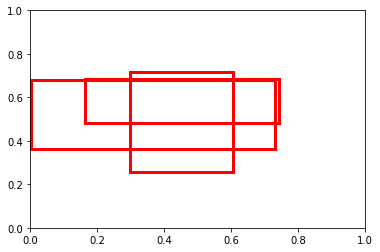

In [6]:
for i in range(x1.shape[0]):
    a,b,c,d,e = x1[i]
    print a, b, c, d

    plt.gca().add_patch(
                plt.Rectangle((a,b),c - a,d - b, facecolor = 'red', fill = False,
                              edgecolor='r', linewidth=3)
                )
plt.show()

0.297769678561 0.258288936413 0.6057103941 0.715438508241


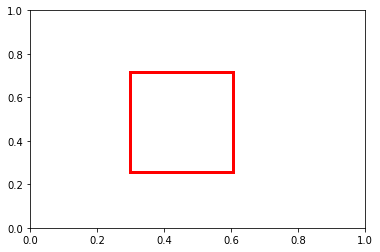

In [7]:
a,b,c,d,e = x1[1]
print a, b, c, d

plt.gca().add_patch(
            plt.Rectangle((a,b),c - a,d - b, facecolor = 'red', fill = False,
                          edgecolor='r', linewidth=3)
            )
plt.show()